In [1]:
import fluidsynth
import pretty_midi as pm 
import mido
from IPython import display
import matplotlib.pyplot as plt
import librosa
import numpy as np
import copy
import os

In [38]:
mid = pm.PrettyMIDI('data/samples/prelude.mid')

In [39]:
_SAMPLING_RATE = 44100
def display_audio(mid: pm.PrettyMIDI, seconds=30):
    waveform = mid.fluidsynth(fs=_SAMPLING_RATE)
    waveform_short = waveform[:seconds*_SAMPLING_RATE]
    return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [40]:
display_audio(mid)

In [41]:
def shift_midi_file(mid, shift):
    mid_cpy = copy.deepcopy(mid)
    for instrument in mid_cpy.instruments:
        if not instrument.is_drum:
            for note in instrument.notes:
                note.pitch += shift
    
    return mid_cpy

In [42]:
display_audio(shift_midi_file(mid, 2))

In [19]:
def plot_piano_roll(mid, start_pitch, end_pitch, segment=[None, None],fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(mid.get_piano_roll(fs)[start_pitch:end_pitch,segment[0]:segment[1]],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pm.note_number_to_hz(start_pitch))

C:\Users\ricar\AppData\Local\Temp\ipykernel_2368\3231542293.py:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(mid.get_piano_roll(fs)[start_pitch:end_pitch,segment[0]:segment[1]],


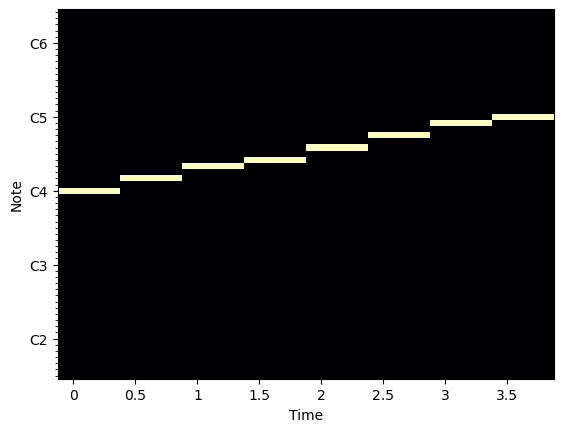

In [20]:
plt.figure()
plot_piano_roll(mid, 30, 90, [0,1000], 4)
plt.show()

In [36]:
pr = mid.get_piano_roll(4)

In [37]:
pr[60:73]

array([[100., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 100., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 100., 100.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 100., 100.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100., 100.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   

In [4]:
import json

In [5]:
with open('data/md5_to_paths.json', 'r') as f:
    data = json.load(f)

In [52]:
data['ee64d5ed25fb16127e5c810efc6274f9']

['C/C Jerome Et Tu Danse Avec Lui.mid']

In [51]:
for key, val in data.items():
    for name in val:
        if 'major' in name:
            print(key, val)
            break

08bb1300476659f0b318896670a89b39 ['Classical_Guitar_classicalguitarmidi.com_MIDIRip/Losy_Suite_Gmajor_3Courante.mid']
ae77907d1887e66b4f273dc9ee4c15b1 ['Classical_Guitar_classicalguitarmidi.com_MIDIRip/Losy_Suite_Gmajor_9Passacaglia.mid']
381eabc1fb60a8a1acc30ada1dfdcac8 ['b/BACH_Johann_Sebastian_-_Suite_no3_in_D_major-_BWV_1068-_Air.mid', 'B/BACH_Johann_Sebastian_-_Suite_no3_in_D_major-_BWV_1068-_Air.mid']
d5a9ded083dfbfd3a2c0a45f47105c25 ['UNSORTED MIDI/andantino c major.mid']
4f3af763c330b51a0fd5cea72b65682a ['e/Emajor.mid', 'E/Emajor.mid']
3531c6865cac7b91b5a4ca1f1751c61f ['M/Mozart_Wolfgang_Amadeus_-_Mozart_Symphony_No._31_KV_297_Paris_D_major.mid']
74313265b064adf02dae03ec45be9074 ['Classical_Guitar_classicalguitarmidi.com_MIDIRip/Mertz_Prelude_Dmajor.mid']
68091bba79f86b8c3e89646f37081112 ['Classical_Guitar_classicalguitarmidi.com_MIDIRip/Vivaldi_Concerto_Gmajor_Allegro2.mid']
4ad9c29ed6ee0af58aa67f254f194ac2 ['m/majorgeneral.mid', 'M/majorgeneral.mid']
1040c3af7a9aac0e7a8c84081

In [43]:
a = [7987, 5768, 963, 3398, 1777, 1908, 3293, 790, 4472, 1111, 2359, 2133, 741]

In [44]:
ans = 0
for i in a:
    ans += i
ans

36700

In [45]:
ans - a[0]

28713